In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
import tensorflow as tf

In [ ]:
import pandas as pd

ruta_archivo = '/content/drive/My Drive/all_days_stats_by_currencies.xlsx'

USD_price = pd.read_excel(ruta_archivo)


print(USD_price.head())

        Fecha  Ofertas de Compra  Ofertas de Venta  Ofertas Indefinidas  \
0  2024-07-16                 30               183                    0   
1  2024-07-15                 33               163                    0   
2  2024-07-14                 37               218                    0   
3  2024-07-13                 44               185                    0   
4  2024-07-12                 40               232                    0   

   Mínimo  Máximo  Promedio  Mediana  Mediana - Compra  Mediana - Venta  
0   315.0   345.0    327.59    330.0             320.0            330.0  
1   320.0   350.0    332.50    335.0             330.0            335.0  
2   320.0   360.0    337.11    340.0             330.0            340.0  
3   330.0   350.0    342.06    340.0             340.0            345.0  
4   335.0   355.0    344.85    345.0             340.0            345.0  


In [ ]:
USD_price['Date'] = USD_price['Fecha']

USD_price['Open'] = USD_price['Mínimo']

USD_price['High'] = USD_price['Máximo']

USD_price['Low'] = USD_price['Mínimo']

USD_price['Close'] = USD_price['Máximo']

USD_price['Adj Close'] = USD_price['Máximo']

USD_price['Volume'] = USD_price['Ofertas de Compra'] + USD_price['Ofertas de Venta'] + USD_price['Ofertas Indefinidas']


In [ ]:
USD_price = USD_price[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close','Volume'] ]

In [ ]:
USD_price = USD_price.iloc[::-1]
USD_price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1290,2021-01-02,45.0,46.0,45.0,46.0,46.0,2
1289,2021-01-03,45.0,46.5,45.0,46.5,46.5,3
1288,2021-01-04,43.0,48.0,43.0,48.0,48.0,8
1287,2021-01-05,43.0,45.0,43.0,45.0,45.0,6
1286,2021-01-06,44.5,46.0,44.5,46.0,46.0,8


In [ ]:
import datetime

def str_to_date(s):
  split= s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)




In [ ]:
USD_price['Date'] = USD_price['Date'].apply(str_to_date)

In [ ]:
USD_price.index = USD_price.pop('Date')

In [ ]:
USD_price.index

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11',
               ...
               '2024-07-07', '2024-07-08', '2024-07-09', '2024-07-10',
               '2024-07-11', '2024-07-12', '2024-07-13', '2024-07-14',
               '2024-07-15', '2024-07-16'],
              dtype='datetime64[ns]', name='Date', length=1291, freq=None)

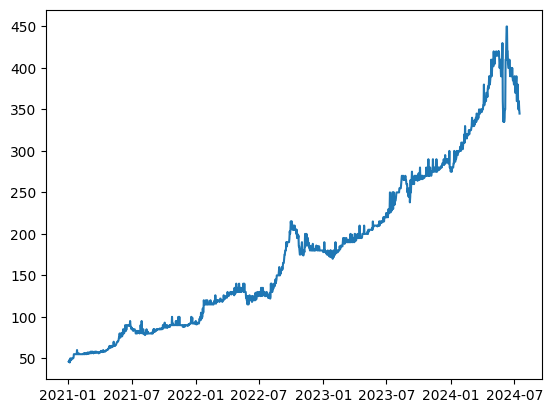

In [ ]:
 import matplotlib.pyplot as plt

 plt.plot(USD_price.index, USD_price['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_date(first_date_str)
  last_date  = str_to_date(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

In [ ]:
USD_price['Daily_Percentage_Change'] = USD_price['Close'].pct_change()

In [ ]:
USD_price['Profit_Loss'] = USD_price['Daily_Percentage_Change'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
USD_price_sample = USD_price[-250:]
USD_price_sample

,Open,High,Low,Close,Adj Close,Volume,Daily_Percentage_Change,Profit_Loss
Date,,,,,,,,
2023-11-10,250.0,275.0,250.0,275.0,275.0,243,0.000000,0
2023-11-11,250.0,290.0,250.0,290.0,290.0,241,0.054545,1
2023-11-12,250.0,275.0,250.0,275.0,275.0,257,-0.051724,0
2023-11-13,233.0,275.0,233.0,275.0,275.0,222,0.000000,0
2023-11-14,258.0,275.0,258.0,275.0,275.0,231,0.000000,0
...,...,...,...,...,...,...,...,...
2024-07-12,335.0,355.0,335.0,355.0,355.0,272,-0.065789,0
2024-07-13,330.0,350.0,330.0,350.0,350.0,229,-0.014085,0
2024-07-14,320.0,360.0,320.0,360.0,360.0,255,0.028571,1


In [ ]:
std_deviation = np.std(USD_price['Daily_Percentage_Change'])

print(f"Standard Deviation of Daily Percentage Changes: {std_deviation:.4f}")

if std_deviation <= 0.02:
    print("Low Risk")
elif 0.02 < std_deviation <= 0.05:
    print("Moderate Risk")
else:
    print("High Risk")

Standard Deviation of Daily Percentage Changes: 0.0284
Moderate Risk


In [ ]:
from sklearn.preprocessing import MinMaxScaler
closing_prices = USD_price['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(closing_prices)

In [ ]:
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

In [ ]:
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        sequences.append(seq)
    return np.array(sequences)

sequence_length = 5  # Adjust as needed
X_train = create_sequences(train_data, sequence_length)
X_test = create_sequences(test_data, sequence_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, train_data[sequence_length:], epochs=10, batch_size=16)

Epoch 1/10
65/65 [==============================] - 4s 8ms/step - loss: 0.0222
Epoch 2/10
65/65 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 3/10
65/65 [==============================] - 1s 8ms/step - loss: 0.0012
Epoch 4/10
65/65 [==============================] - 1s 8ms/step - loss: 0.0013
Epoch 5/10
65/65 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 6/10
65/65 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 7/10
65/65 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 8/10
65/65 [==============================] - 1s 8ms/step - loss: 9.5845e-04
Epoch 9/10
65/65 [==============================] - 1s 10ms/step - loss: 8.1772e-04
Epoch 10/10
65/65 [==============================] - 1s 12ms/step - loss: 9.9032e-04


In [ ]:
predicted_scaled_prices = model.predict(X_test)

8/8 [==============================] - 0s 4ms/step


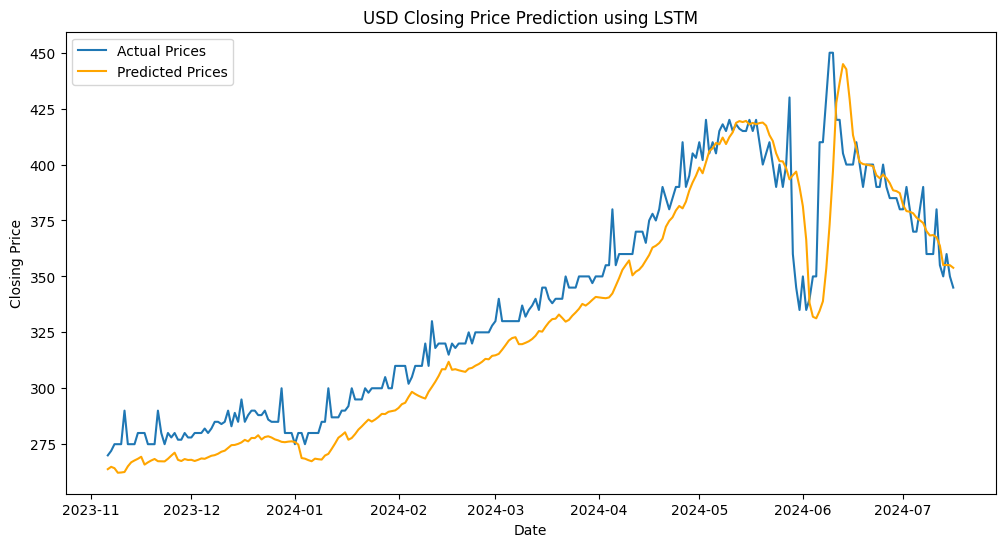

In [ ]:
predicted_prices = scaler.inverse_transform(predicted_scaled_prices)
plt.figure(figsize=(12, 6))
plt.plot(USD_price.index[train_size+sequence_length:], closing_prices[train_size+sequence_length:], label='Actual Prices')
plt.plot(USD_price.index[train_size+sequence_length:], predicted_prices, label='Predicted Prices', color='orange')
plt.title('USD Closing Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
full_train_data = scaled_prices

X_full_train = create_sequences(full_train_data, sequence_length)

In [ ]:
future_predictions_scaled = model.predict(X_full_train[-50:])

2/2 [==============================] - 0s 8ms/step


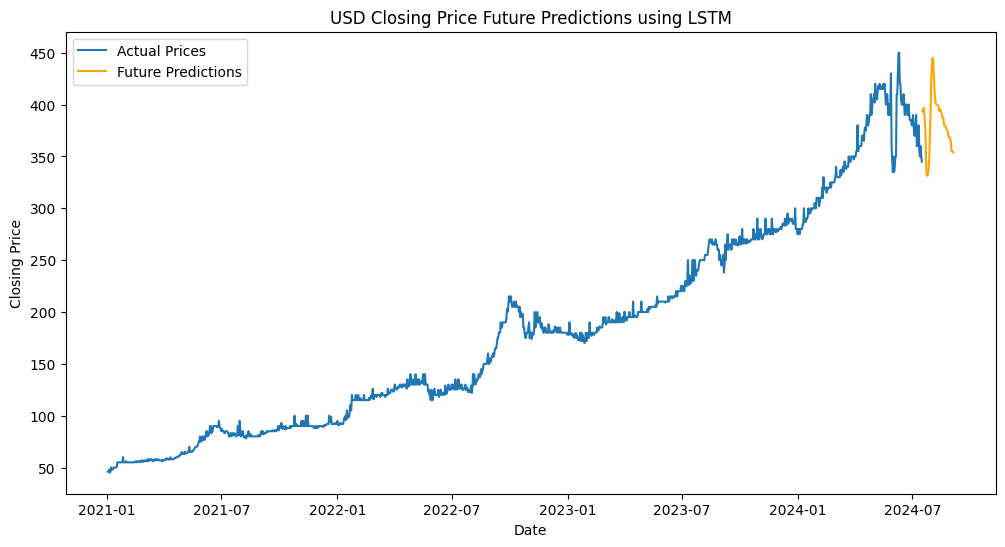

In [ ]:
future_predictions = scaler.inverse_transform(future_predictions_scaled)

plt.figure(figsize=(12, 6))
plt.plot(USD_price.index, closing_prices, label='Actual Prices')
plt.plot(pd.date_range(start=USD_price.index[-1], periods=51, freq='D')[1:], future_predictions, label='Future Predictions', color='orange')
plt.title('USD Closing Price Future Predictions using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


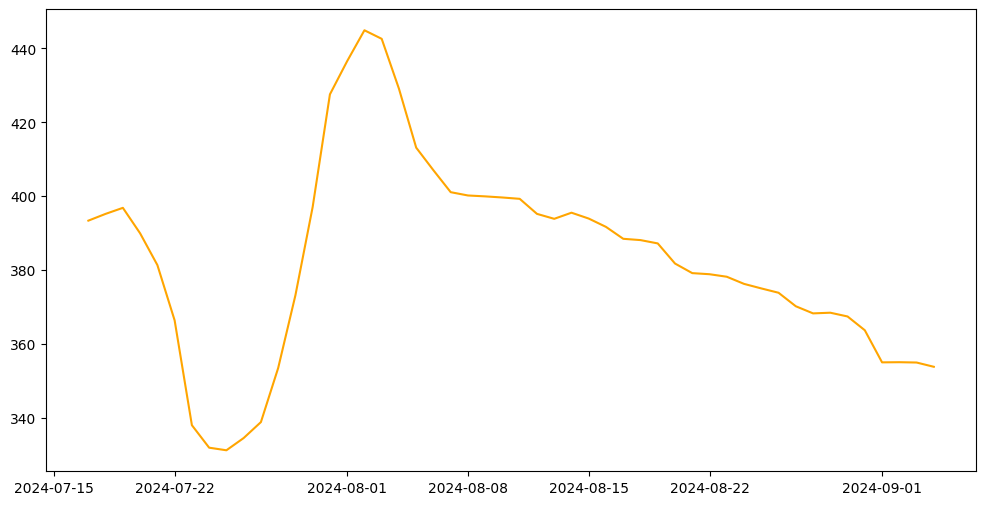

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pd.date_range(start=USD_price.index[-1], periods=51, freq='D')[1:], future_predictions, label='Future Predictions', color='orange')
plt.show()